# Bot Tweet Analysis

In this notebook, analysis related to bots are carried out to determine possible business implications or impact these bot tweets might have on Zalando's brand perception.




In [2]:
import sys
sys.path.append('../')
import functions
exec(open('./functions.py', encoding="utf8").read())

# demoji.download_codes()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chiso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chiso\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chiso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#load labelled data (generated in file 2.preprocessing)
data = pickle.load(open('data_n_models/eng_df_labelled.pkl', "rb"))
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,0.0,NaN,@zalando,en,money owe,give money you owe me!!!,0.0000,"(money, owe)",money owe
1,1,1189512849472643072,105,Labellerr1,#VirtualStyling and try-on increases the conve...,0,chandigarh,06-Mar-2021,18,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...,0.7650,"(virtualstyling, try, increases, conversion, r...",virtualstyle try increase conversion rate larg...
2,2,2837691996,270,puneetjindalisb,#VirtualStyling and try-on increases the conve...,0,"Chandigarh, India",06-Mar-2021,149,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...,0.7650,"(virtualstyling, try, increases, conversion, r...",virtualstyle try increase conversion rate larg...
3,3,1125728513666048000,9604,DommeLineCoUk,@missbellalugosi @Zalando Problem starts at Ad...,0,,06-Mar-2021,2193,False,1.0,1.368196e+18,@zalando,en,problem starts adidas selling latex websites,Problem starts Adidas. They're selling latex t...,-0.4019,"(problem, starts, adidas, selling, latex, webs...",problem start adida sell latex website
4,4,2614256724,35470,medboyUK,@missbellalugosi @Zalando Welcome to my world ...,0,"West Midlands, UK",06-Mar-2021,2503,False,1.0,1.368196e+18,@zalando,en,welcome world sneering disdain,Welcome world sneering and disdain!,-0.1007,"(welcome, world, sneering, disdain)",welcome world sneer disdain


In [3]:
# the function classify_bots() is applied on the data. This function looks for words matching the regular expressions or words identified as bot related tweets, then adds a column which tags tweets as True for bot related, and as False otherwise. 

bot_df = classify_bots(data)
bot_df.head()

C:\Users\chiso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma,bot
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,0.0,NaN,@zalando,en,money owe,give money you owe me!!!,0.0000,"(money, owe)",money owe,False
1,1,1189512849472643072,105,Labellerr1,#VirtualStyling and try-on increases the conve...,0,chandigarh,06-Mar-2021,18,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...,0.7650,"(virtualstyling, try, increases, conversion, r...",virtualstyle try increase conversion rate larg...,False
2,2,2837691996,270,puneetjindalisb,#VirtualStyling and try-on increases the conve...,0,"Chandigarh, India",06-Mar-2021,149,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...,0.7650,"(virtualstyling, try, increases, conversion, r...",virtualstyle try increase conversion rate larg...,False
3,3,1125728513666048000,9604,DommeLineCoUk,@missbellalugosi @Zalando Problem starts at Ad...,0,,06-Mar-2021,2193,False,1.0,1.368196e+18,@zalando,en,problem starts adidas selling latex websites,Problem starts Adidas. They're selling latex t...,-0.4019,"(problem, starts, adidas, selling, latex, webs...",problem start adida sell latex website,False
4,4,2614256724,35470,medboyUK,@missbellalugosi @Zalando Welcome to my world ...,0,"West Midlands, UK",06-Mar-2021,2503,False,1.0,1.368196e+18,@zalando,en,welcome world sneering disdain,Welcome world sneering and disdain!,-0.1007,"(welcome, world, sneering, disdain)",welcome world sneer disdain,False


In [4]:
# change compound from continous to categorical variable. The column compound was generated with Vader sentiment analyzer in another notebook during the preprocessing stage.
bot_df["compound"] = np.where(bot_df["compound"] > 0, 1, bot_df["compound"])      
bot_df["compound"] = np.where(bot_df["compound"] == 0, 0, bot_df["compound"])    
bot_df["compound"] = np.where(bot_df["compound"] < 0, -1, bot_df["compound"])    
#bot_df.head()

In [5]:
# estimating the total number of tweets related to bots in the dataframe, and comparing them to the total number of all tweets. 
print("data shape:  ", bot_df.shape)

bt = bot_df[bot_df["bot"] == True]
print("bot related: ", bt.shape)

print("\n\nThere are a total of {} tweets, out of which {} tweets are bot related. \
\nThis shows that {} percent of all tweets are bot related.".format(bot_df.shape[0], bt.shape[0], round(bt.shape[0] / bot_df.shape[0] * 100,2)))

data shape:   (64432, 20)
bot related:  (2691, 20)


There are a total of 64432 tweets, out of which 2691 tweets are bot related. 
This shows that 4.18 percent of all tweets are bot related.


In [6]:
# estimating the total number of tweets related to bots with respect to Zalando, and comparing them to the total number of all tweets referring to Zalando
za = bot_df[bot_df["keyword"].isin(["zalando", "@zalando"])]                                    # all tweets relating to zalando
bt_za = bot_df[(bot_df["bot"] == True) & (bot_df["keyword"].isin(["zalando", "@zalando"]))]     # all bots related tweets about zalando
print("There are a total of {} tweets, out of which {} tweets are bot related. \
\nThis shows that {} percent of all tweets on Zalando are bot related.".format(za.shape[0], bt_za.shape[0], round(bt_za.shape[0] / za.shape[0] * 100,2)))

bot_df["keyword"].value_counts()
bohoo = bot_df[bot_df["keyword"].isin(["bohoo"])]
asos = bot_df[bot_df["keyword"].isin(["asos"])]
bt_bohoo = bot_df[(bot_df["bot"] == True) & (bot_df["keyword"].isin(["bohoo"]))] 
bt_asos = bot_df[(bot_df["bot"] == True) & (bot_df["keyword"].isin(["asos"]))] 

print("\n\nThere are a total of {} Bohoo tweets, out of which {} tweets are bot related. \
\nThis shows that {} percent of all tweets on Bohoo are bot related.".format(bohoo.shape[0], bt_bohoo.shape[0], round(bt_bohoo.shape[0] / bohoo.shape[0] * 100,2)))

print("\n\nThere are a total of {} Asos tweets, out of which {} tweets are bot related. \
\nThis shows that {} percent of all tweets on Asos are bot related.".format(asos.shape[0], bt_asos.shape[0], round(bt_asos.shape[0] / asos.shape[0] * 100,2))) 

There are a total of 2718 tweets, out of which 572 tweets are bot related. 
This shows that 21.04 percent of all tweets on Zalando are bot related.


There are a total of 168 Bohoo tweets, out of which 2 tweets are bot related. 
This shows that 1.19 percent of all tweets on Bohoo are bot related.


There are a total of 36694 Asos tweets, out of which 2011 tweets are bot related. 
This shows that 5.48 percent of all tweets on Asos are bot related.


In [7]:
# Tweets classified as bots related are filtered out and stored under the name bot_tweets
bt_za.head(2)

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma,bot
9,9,1259761930304196610,3,fattybabycat,".@Zalando offers nothing more than scripted, c...",0,,05-Mar-2021,0,False,0.0,NaN,@zalando,en,offers scripted cordial replies instead actual...,"offers nothing more than scripted, cordial rep...",-1.0,"(offers, scripted, cordial, replies, instead, ...",offer script cordial reply instead actual cust...,True
3103,10,1234494948273053696,39,JasonCh53349166,@DragonAIOBot Oh yea，Im saw my friend take nik...,0,,07-Mar-2021,2,False,1.0,1.368275e+18,zalando,en,yea，im saw friend nike zalando stocks ，wish co...,yea，Im saw friend take nike and zalando stocks...,1.0,"(yea，im, saw, friend, nike, zalando, stocks, ，...",yea，im see friend nike zalando stock ， wish co...,True


In [14]:
# export the model to csv for manual inspection.
# bt_za.to_csv("data_n_models/zalando_bots.csv")

# import the manually verified CSV document.
bots_v = pd.read_csv("data_n_models/zalando_bots.csv")

In [36]:
error_rate = bots_v.groupby("verification").count().reset_index()
print("The False Positive Rate is {}%, {} tweets were falsely classified as bots, while {} were rightly classified as bots related tweets.".format(round(error_rate["bot"][0]/error_rate["bot"].sum() * 100, 2), error_rate["bot"][0], error_rate["bot"][1] ))
error_rate[["verification", "bot"]]

The False Positive Rate is 0.87%, 5 tweets were falsely classified as bots, while 567 were rightly classified as bots related tweets.


,verification,bot
0,F,5
1,T,567


In [68]:
asos_weather = asos[asos["name"].isin(["iembot_ggw", "iembot_byz", "iembot_gyx", "iembot_riw", "iembot_bis", "iembot_pih"])]
asos_weather.shape

(606, 20)

In [65]:
# function to count values in single columns and determine the percentage

def count_values(data, feature):
    total = data.loc[:,feature].value_counts(dropna= False)
    percentage = round(data.loc[:,feature].value_counts(dropna= False, normalize= True) * 100, 2)
    return pd.concat([total, percentage], axis= 1, keys= ['Total', 'Percentage'])

# apply the function on bt_za
print("Bot Tweet Sentiment Summary Zalando: \n{}".format(count_values(bt_za, 'compound')))
print("\n\nBot Tweet Sentiment Summary Bohoo: \n{}".format(count_values(bt_bohoo, 'compound')))
print("\n\nBot Tweet Sentiment Summary Asos: \n{}".format(count_values(bt_asos, 'compound')))

Bot Tweet Sentiment Summary Zalando: 
      Total  Percentage
 1.0    285       49.83
 0.0    182       31.82
-1.0    105       18.36


Bot Tweet Sentiment Summary Bohoo: 
      Total  Percentage
-1.0      1        50.0
 1.0      1        50.0


Bot Tweet Sentiment Summary Asos: 
      Total  Percentage
 0.0   1536       76.38
-1.0    317       15.76
 1.0    158        7.86


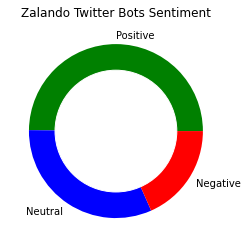

In [13]:
# display the above values in a pie chart.
pichart = count_values(bt_za, 'compound')
names = ['Positive', 'Neutral', 'Negative']
size = pichart ['Percentage']

# create a circle for the center of the plot
circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Zalando Twitter Bots Sentiment")
plt.show()

In [14]:
# Example of a positive bot sentiment tweet
bt_za['tweet'][3103]

'@DragonAIOBot Oh yea，Im saw my friend take nike and zalando stocks ，wish I could cop with 🐉 😭😭@screaM_m21'

In [15]:
# Example of a negative bot sentiment tweet
bt_za['tweet'][3108]

'@EtherealScripts Really need a key for the UNC drop on zalando if I join I can destroy with ethereal 🍀🙏'

Word Cloud Saved Successfully


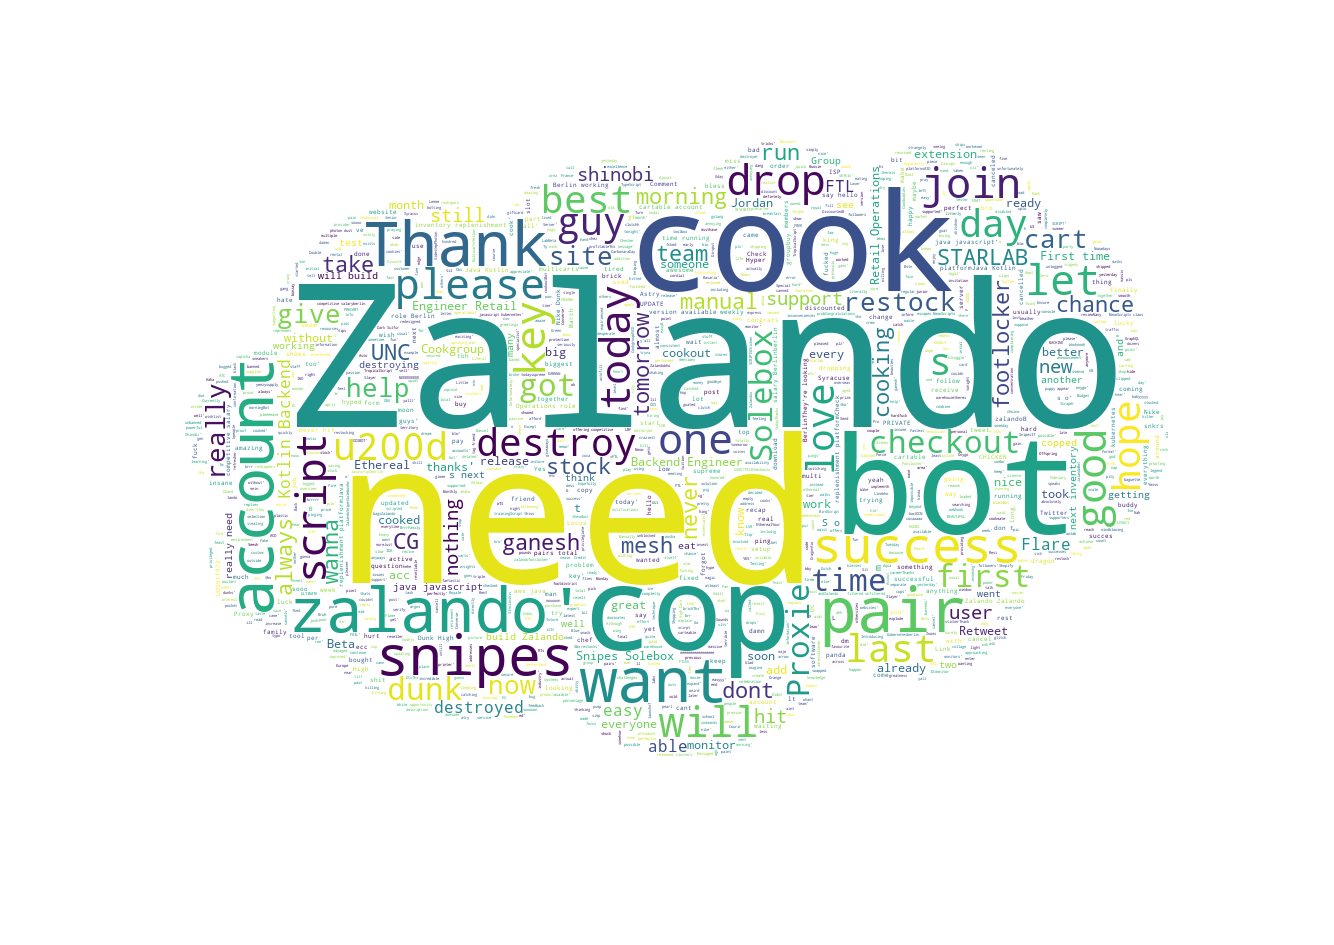

In [38]:
# Function to create a wordcloud
def create_wordcloud(tweet, path='data_n_models\wc.png'):
    """ this function takes in two arguments, the path to save the file and the tweet"""
    mask = np.array(Image.open("data_n_models\cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white', mask = mask, max_words=3000, stopwords=stopwords, repeat=True)
    wc.generate(str(tweet))
    wc.to_file(path)
    print('Word Cloud Saved Successfully')
    display(Image.open(path))
#Creating wordcloud for all tweets
create_wordcloud(bt_za['clean_vader'].values)

Word Cloud Saved Successfully


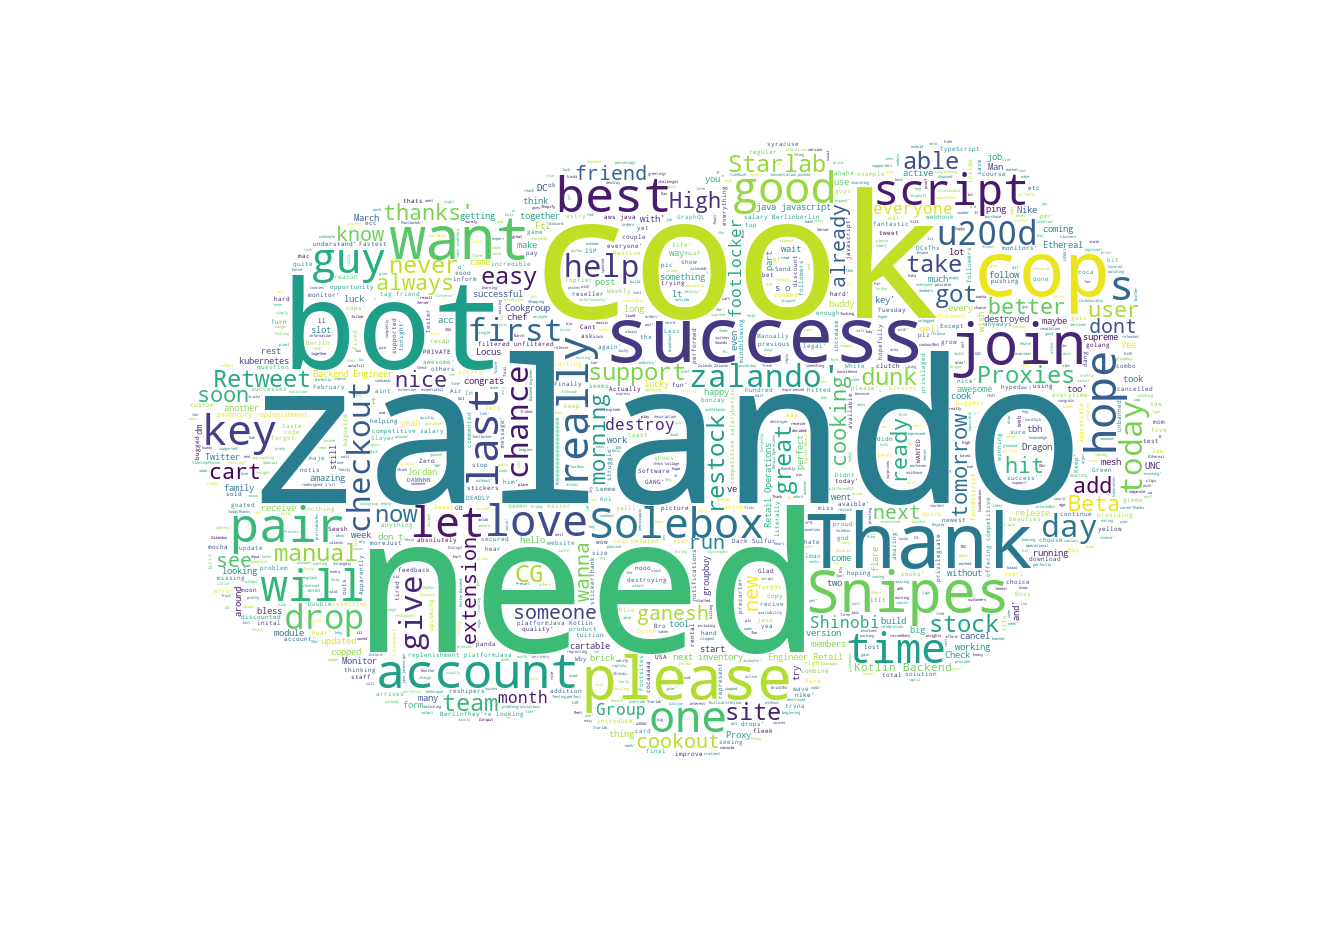

In [39]:
#Creating wordcloud for all positive bot tweets
create_wordcloud(bt_za_pos['clean_vader'].values, 'data_n_models\pwc.png')

Word Cloud Saved Successfully


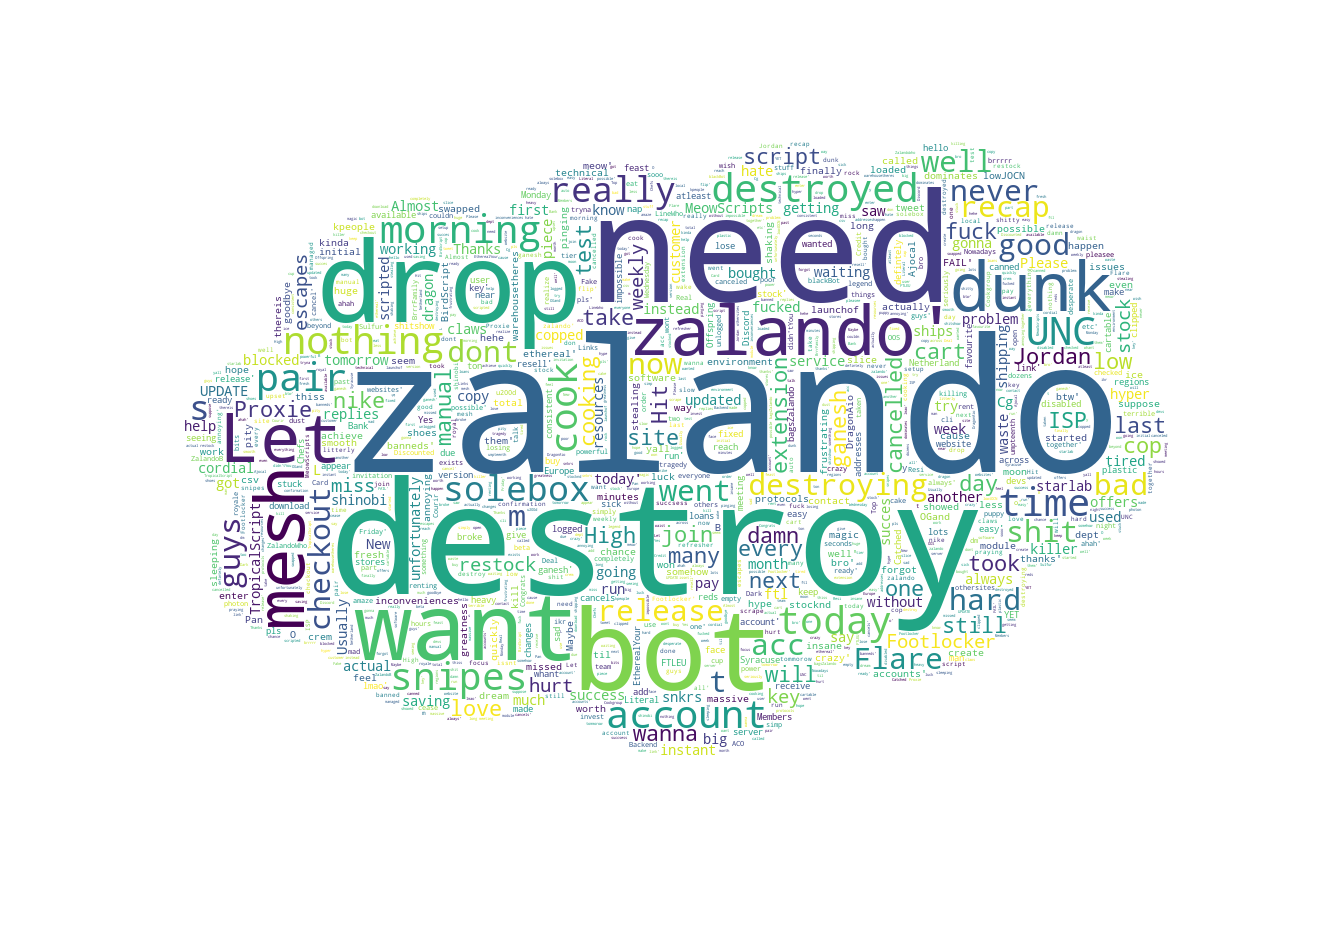

In [42]:
#Creating wordcloud for all negative bot tweets
create_wordcloud(bt_za_neg['clean_vader'].values, 'data_n_models\\nwc.png')

Word Cloud Saved Successfully


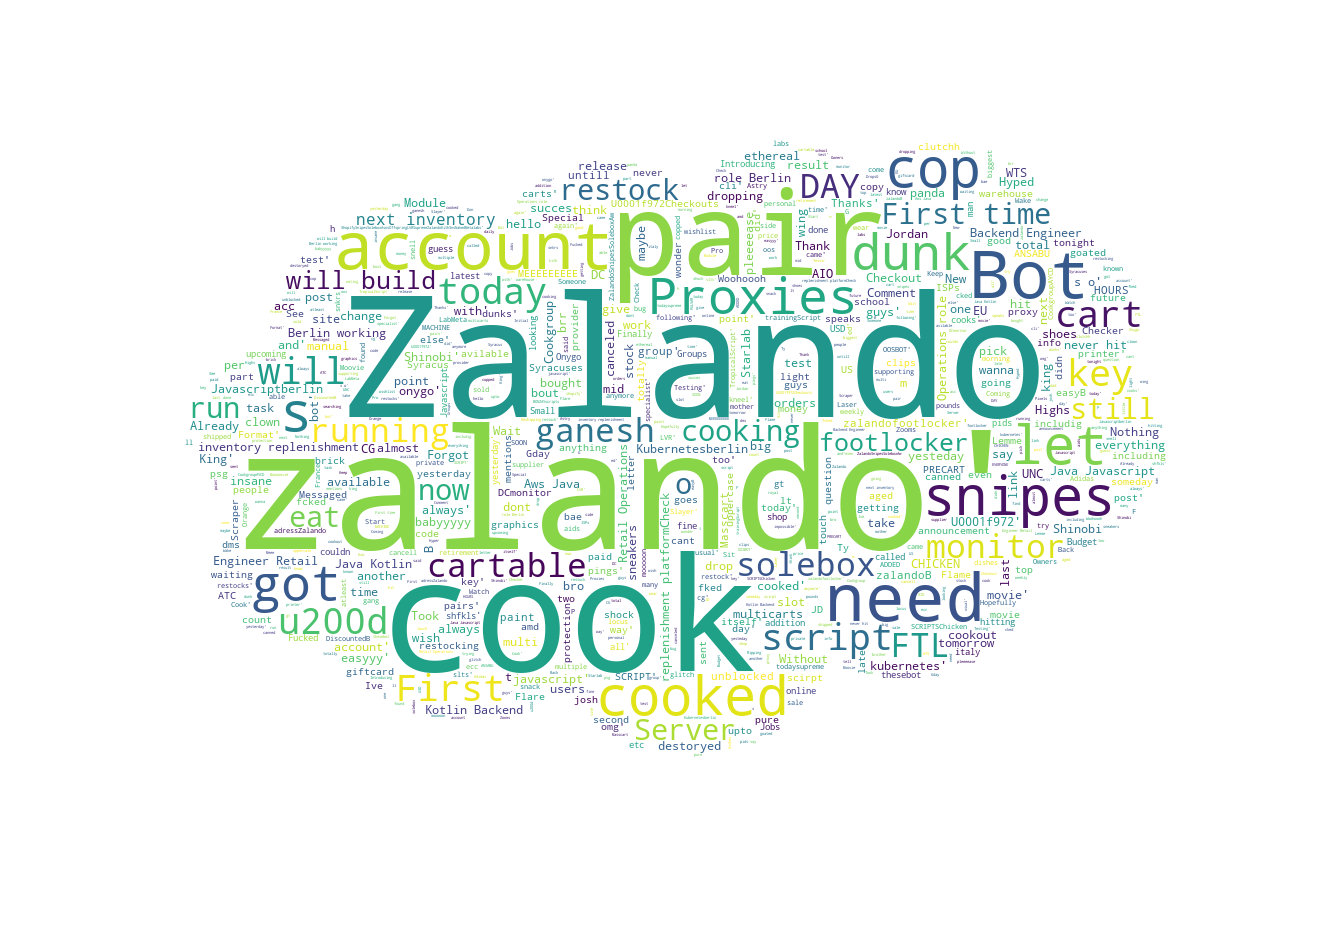

In [43]:
#Creating wordcloud for all neutral bot tweets
create_wordcloud(bt_za_neu['clean_vader'].values, 'data_n_models\\neuwc.png')

In [123]:
# convert the created to pandas datetime format
bt_za['created'] = pd.to_datetime(bt_za['created'], format='%Y%m', errors= 'ignore')

# considering only the months of bot tweet creation
mon = bt_za['created'].groupby([bt_za['created'].dt.month]).count().reset_index(name='count')

# considering only the weekday of bot tweet creation
wkd = bt_za['created'].groupby([bt_za['created'].dt.weekday]).count().reset_index(name='count')

# considering only the day of bot tweet creation
dy = bt_za['created'].groupby([bt_za['created'].dt.day]).count().reset_index(name='count')

<ipython-input-123-dbb5e2b2642b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bt_za['created'] = pd.to_datetime(bt_za['created'], format='%Y%m', errors= 'ignore')


In [127]:
#assign different X and y values for days, weekdays, and months

#month
Xm = mon["created"]
ym = mon["count"]

#day
Xd = dy["created"]
yd = dy["count"]

#weekday
Xwkd = wkd["created"]
ywkd = wkd["count"]

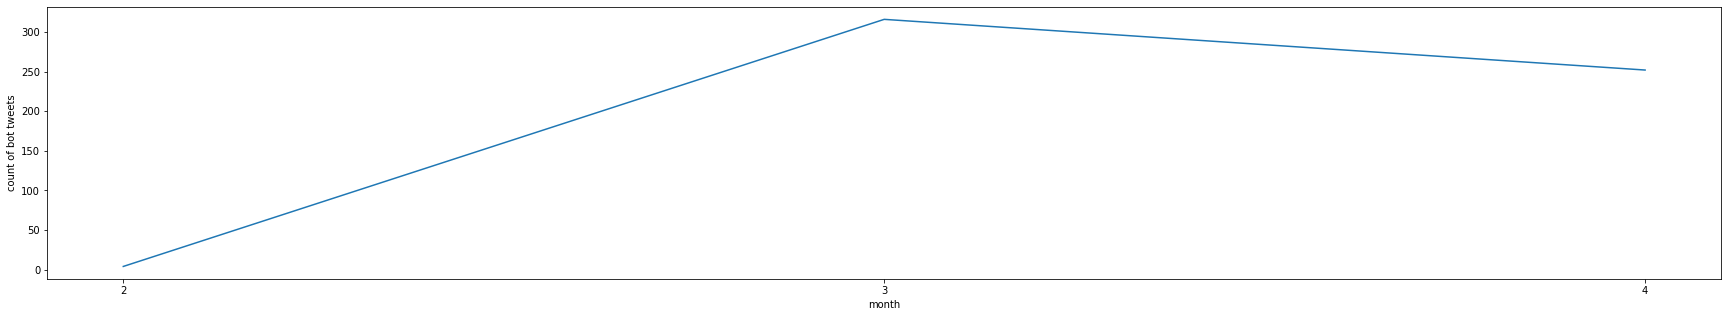

In [137]:
# month 2 = February, etc.
plt.figure(figsize=(30,5))
plt.xticks(np.arange(min(Xm), max(Xm)+1, 1.0))
plt.ylabel("count of bot tweets")
plt.xlabel("month")
plt.plot(Xm, ym)

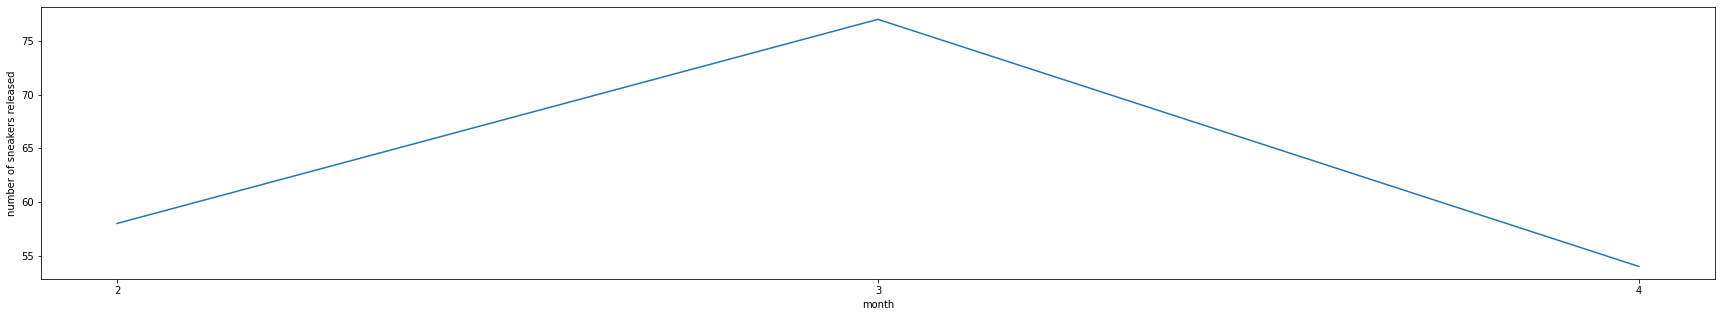

In [2]:
# sneaker releases for the months under consideration source: https://sneakerbardetroit.com/archived-sneaker-release-dates-january-june-2021/ 
Xs = [2, 3, 4]
ys = [58, 77, 54]
plt.figure(figsize=(30,5))
plt.xticks(np.arange(min(Xs), max(Xs)+1, 1.0))
plt.ylabel("number of sneakers released")
plt.xlabel("month")
plt.plot(Xs, ys)

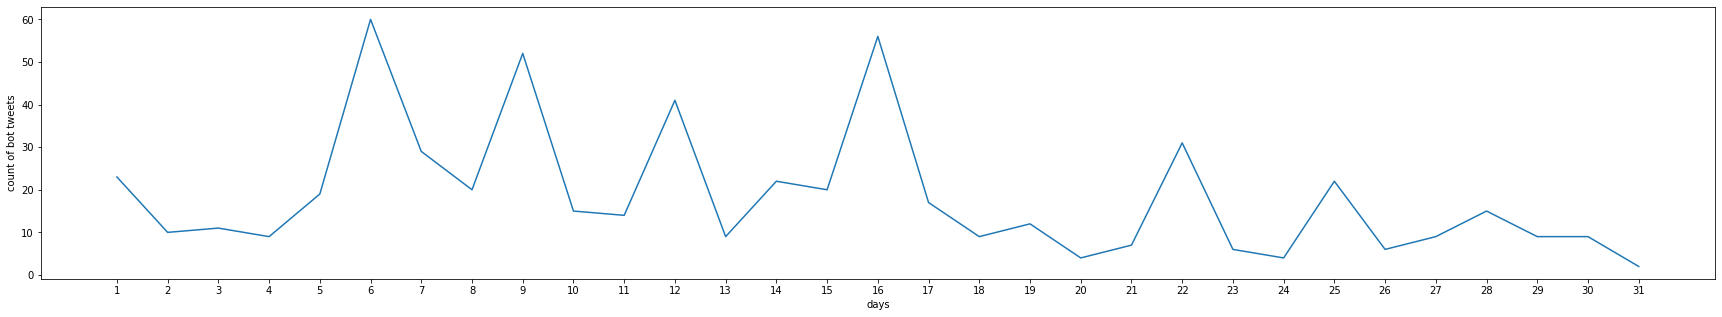

In [136]:
plt.figure(figsize=(30,5))
plt.xticks(np.arange(min(Xd), max(Xd)+1, 1.0))
plt.ylabel("count of bot tweets")
plt.xlabel("days")
plt.plot(Xd, yd)

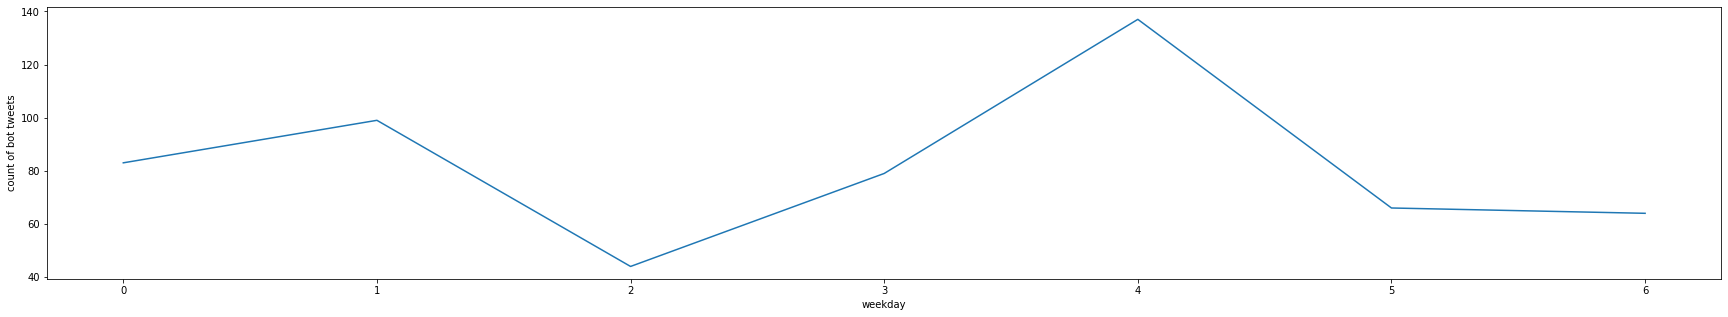

In [139]:
# 0 denotes Monday, and 6 denotes Sunday
plt.figure(figsize=(30,5))
plt.xticks(np.arange(min(Xwkd), max(Xwkd)+1, 1.0))
plt.ylabel("count of bot tweets")
plt.xlabel("weekday")
plt.plot(Xwkd, ywkd)

# Miscellaneous

In [44]:
data["compound"] = np.where(data["compound"] > 0, 1, data["compound"])      
data["compound"] = np.where(data["compound"] == 0, 0, data["compound"])    
data["compound"] = np.where(data["compound"] < 0, -1, data["compound"]) 
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lem,lemma,bot
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,0.0,NaN,@zalando,en,money owe,give money you owe me!!!,0.0,"(money, owe)",money owe,False
1,1,1189512849472643072,105,Labellerr1,#VirtualStyling and try-on increases the conve...,0,chandigarh,06-Mar-2021,18,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...,1.0,"(virtualstyling, try, increases, conversion, r...",virtualstyle try increase conversion rate larg...,False
2,2,2837691996,270,puneetjindalisb,#VirtualStyling and try-on increases the conve...,0,"Chandigarh, India",06-Mar-2021,149,False,0.0,NaN,@zalando,en,virtualstyling try increases conversion rate l...,VirtualStyling and try-on increases the conver...,1.0,"(virtualstyling, try, increases, conversion, r...",virtualstyle try increase conversion rate larg...,False
3,3,1125728513666048000,9604,DommeLineCoUk,@missbellalugosi @Zalando Problem starts at Ad...,0,,06-Mar-2021,2193,False,1.0,1.368196e+18,@zalando,en,problem starts adidas selling latex websites,Problem starts Adidas. They're selling latex t...,-1.0,"(problem, starts, adidas, selling, latex, webs...",problem start adida sell latex website,False
4,4,2614256724,35470,medboyUK,@missbellalugosi @Zalando Welcome to my world ...,0,"West Midlands, UK",06-Mar-2021,2503,False,1.0,1.368196e+18,@zalando,en,welcome world sneering disdain,Welcome world sneering and disdain!,-1.0,"(welcome, world, sneering, disdain)",welcome world sneer disdain,False


In [46]:
data[data["keyword"].isin(["zalando", "@zalando"])]["compound"].value_counts()   # Total sentiments associated with Zalando

 1.0    1378
 0.0     926
-1.0     414
Name: compound, dtype: int64

In [48]:
bt_za[bt_za["keyword"].isin(["zalando", "@zalando"])]["compound"].value_counts()  

 1.0    285
 0.0    182
-1.0    105
Name: compound, dtype: int64

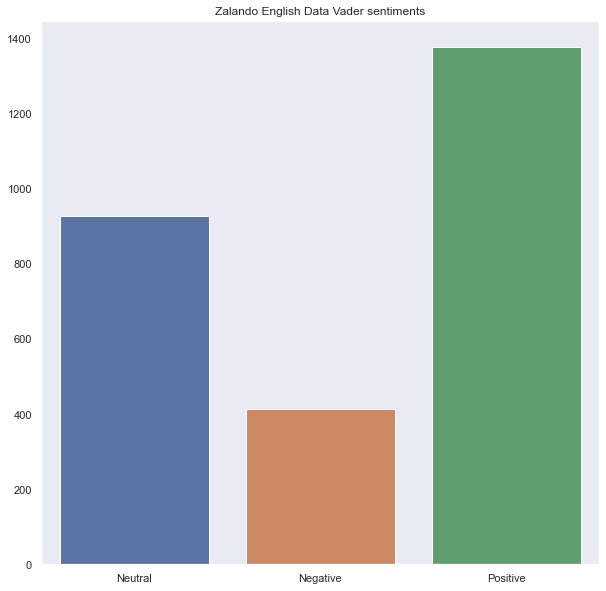

In [39]:
plt.figure(figsize=(10,10))
plt.title("Zalando English Data Vader sentiments")
ax = sns.barplot(x=["Positive", "Neutral", "Negative"], y=[1378, 926, 414], order=["Neutral", "Negative", "Positive"])
ax.grid(False)


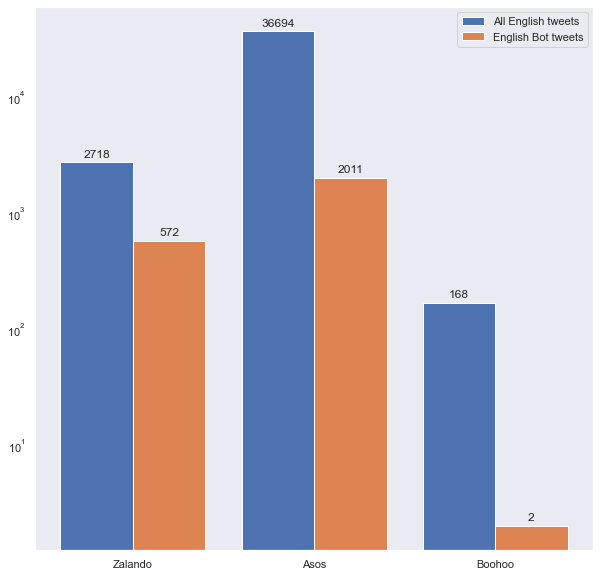

In [82]:
x = ["Zalando", "Asos", "Boohoo"]
y = [2718, 36694, 168]
y2 = [572, 2011, 2]

width = 0.4

bar1 = np.arange(len(x))
bar2 = [i+width for i in bar1]
fig, ax = plt.subplots(figsize=(10,10))
ax.set_yscale('log')
rects1 = ax.bar(bar1, y, width, label='All English tweets')
rects1 = ax.bar(bar2, y2, width, label='English Bot tweets')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)      # put the values on each bar
ax.grid(False)

plt.legend()
plt.xticks(bar1 + width/2, x)  # + width/2 to make the labels appear in the middle

plt.show(rects1)


# bots free data shuffling

In [19]:
bots_class = pickle.load(open('data_n_models/4.eng_df_bot_classified.pkl', "rb"))
bots_class.head(1)

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
0,0,819101311715131392,77,Ali09685762,@Zalando give me my money you owe me!!!,0,,07-Mar-2021,6,False,0.0,NaN,zalando,en,money owe,give money you owe me!!!,0.0,money owe,False


In [20]:
bots_free_za = bots_class[(bots_class['bot'] == False) & (bots_class['keyword'].isin(["zalando", "@zalando"]))]
bots_free_za['bot'].value_counts()

False    2028
Name: bot, dtype: int64

In [21]:
bots_free_za["compound"] = np.where(bots_free_za["compound"] > 0, 1, bots_free_za["compound"])      
bots_free_za["compound"] = np.where(bots_free_za["compound"] == 0, 0, bots_free_za["compound"])    
bots_free_za["compound"] = np.where(bots_free_za["compound"] < 0, -1, bots_free_za["compound"]) 
bots_free_za["compound"].value_counts()

<ipython-input-21-7e4947eb7fac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bots_free_za["compound"] = np.where(bots_free_za["compound"] > 0, 1, bots_free_za["compound"])
<ipython-input-21-7e4947eb7fac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bots_free_za["compound"] = np.where(bots_free_za["compound"] == 0, 0, bots_free_za["compound"])
<ipython-input-21-7e4947eb7fac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

 1.0    1036
 0.0     715
-1.0     277
Name: compound, dtype: int64

In [23]:
shuffled_df = bots_free_za.sample(frac=1, random_state= 42)
shuffled_df.head(2)

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
73842,4,1098255793584029697,61427,BrunetteJenner,Also where the fuck are my shoes Zalando ???,0,,31-Mar-2021,259,False,0.0,NaN,zalando,en,fuck shoes zalando,Also where the fuck are shoes Zalando ???,-1.0,fuck shoe zalando,False
41440,197,624917710,903936,IvanGagliolo,"@Irina_Vukolova\n😃 And a new set of dresses, M...",0,Abbiategrasso (Milan),21-Mar-2021,0,False,0.0,NaN,zalando,en,new set dresses love combined night clothes 🤗😘...,"And new set dresses, love. combined with last ...",1.0,new set dress love combine night clothe ℐℓ٥ﻻﻉ√٥υ,False


In [24]:
first500 = shuffled_df.iloc[:500, :]
first500.shape

(500, 19)

In [25]:
verify_vader = first500[["tweet", "compound"]]
verify_vader.head()

,tweet,compound
73842,Also where the fuck are my shoes Zalando ???,-1.0
41440,"@Irina_Vukolova\n😃 And a new set of dresses, M...",1.0
93153,Could the #data mesh solve your #data lake sca...,1.0
20764,Zalando aims for more than 10% of Europe fashi...,0.0
73851,New Balance UK 10\nZalando uk 9\nZara Man uk 6...,0.0


In [27]:
verify_vader.to_csv(r"data_n_models\verify_vader.csv")

In [46]:
verify_vader.loc[13530][0]

'Zalando - Reversal am Support https://t.co/qG6LHWiHLG'

In [45]:
verify_vader.loc[10013][0]

"Have been looking forward to my @zalando_uk parcel for a week now. Unfortunately, @Hermesparcels failed to deliver it 5 times in a row!!! @dhlexpressuk Can't you guys help me out?"

In [44]:
verify_vader.loc[86860][0]

'@kissesforloui Zalando might be dry af but if you search long enough they have sum good stuff'

In [47]:
verify_vader.loc[60954][0]

'@Zalando_Press Your service is worst of all . You cancel part of orders without informing clients and then you hangup on them when they call and they have to spend more time and money in reordering and then wait for you to resettle . And then on top of that you get this message https://t.co/ed2rRDR4Yq'

In [48]:
verify_vader.loc[80692][0]

'Hey @Zalando instead of asking your customers to contribute to offset our carbon footprint on orders, consider sending the items together as one package, that may help. Also your management board alone have enough money to contribute to that #EatTheRich'

In [49]:
verify_vader.loc[67379][0]

'As covid is interrupting our lives more, I’m trying my best to support local, small companies. I think zalando and amazon have enough of my money. For me local obviously means South Africa and Europe. Never forget my roots 😉 #shoplocal #supportsmallbusiness'

In [51]:
verify_vader.loc[100073][0]

"@Zalando acting stupid. Body shaming is not a thing. If you are fat or obese then you need to be told that, so that you can correct yourself and not eat yourself into an early @benandjerrys grave. Companies don't give a shit about you. https://t.co/EKhyIHKxex"

In [52]:
verify_vader.loc[106092][0]

'@nikebasketball @Nike ZALANDO HAS NOT RETURNED ME THE MONEY FOR THE REFUND I made a return of some Nike sports shoes, and ZALANDO has told me that they have received some flip flops.  They have not provided me with any documentation of my shipment, only the photos of said flip flops.'

In [54]:
verify_vader.loc[93556][0]

'@Zalando That makes sense, thank you!'

In [55]:
verify_vader.loc[41804][0]

'@Zalando Hey! Are you aware that your partner @ATC_Celeritas is the worst experience and service ever? What will you do to finally solve this?'

In [56]:
verify_vader.loc[80280][0]

'Disgusting AD from @ZalandoTech @Zalando_Press Shameful !'

In [57]:
verify_vader.loc[17291][0]

'if zalando knew how much money they\'re leaving on the table by not letting me sort my wish list by "price: low to high" i\'d be ruined'